<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/401_%EC%97%B0%EC%86%8D%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

연속형 데이터 시각화
- 각 데이터의 크기순으로 전체적인 모양이나 분포,관계를 산점도나 히스토그램으로 시각화


1) 산점도
- n개의 짝으로 이루어진 자료(컬럼이 2개 이상)를 x,y축 평면에 점으로 나타내는 그래프
- 자료의 분포를 파악하는데 사용
- 주로 상관/회귀분석에 사용
plot(x축값, y축값, 옵션)
plot(y축값, 옵션) ==> x축값은 1~n으로 자동 지정

In [1]:
# 한글사용 설정
install.packages('showtext')
library(showtext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
font_add_google('Nanum Gothic','ng')
showtext_auto()

In [3]:
load("heights.rdata")

In [5]:
heights

[1] 170 165 182 153 142 165 159 147 175 172

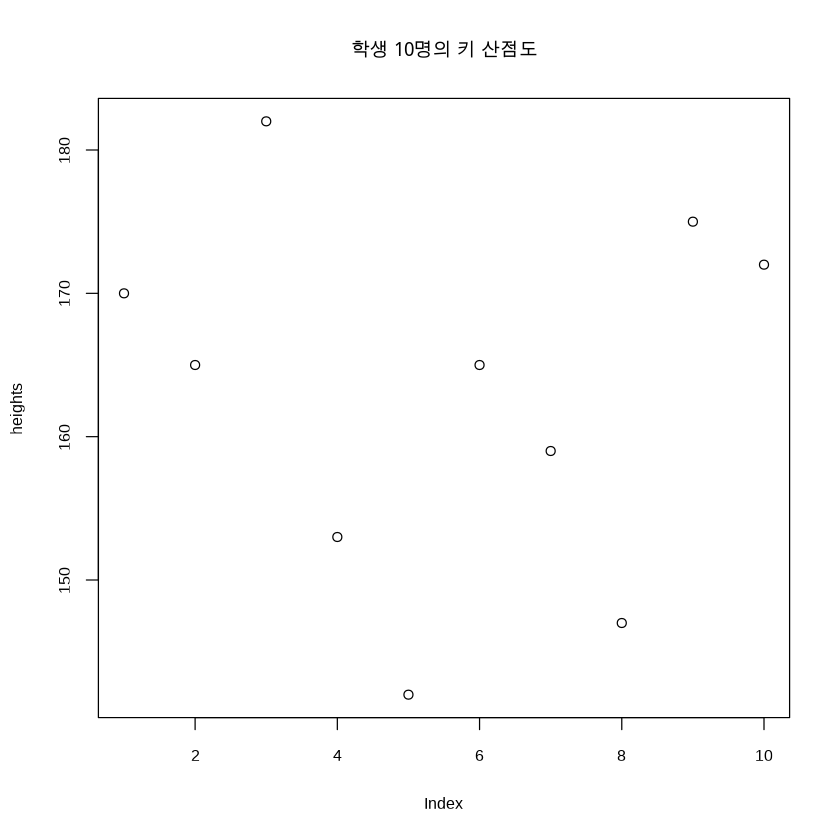

In [7]:
plot(heights, main = "학생 10명의 키 산점도")
# y축값만 존재하는 경우 값의 크기를 시각화 --> 막대그래프로 표현하는 것이 좋을수 있음

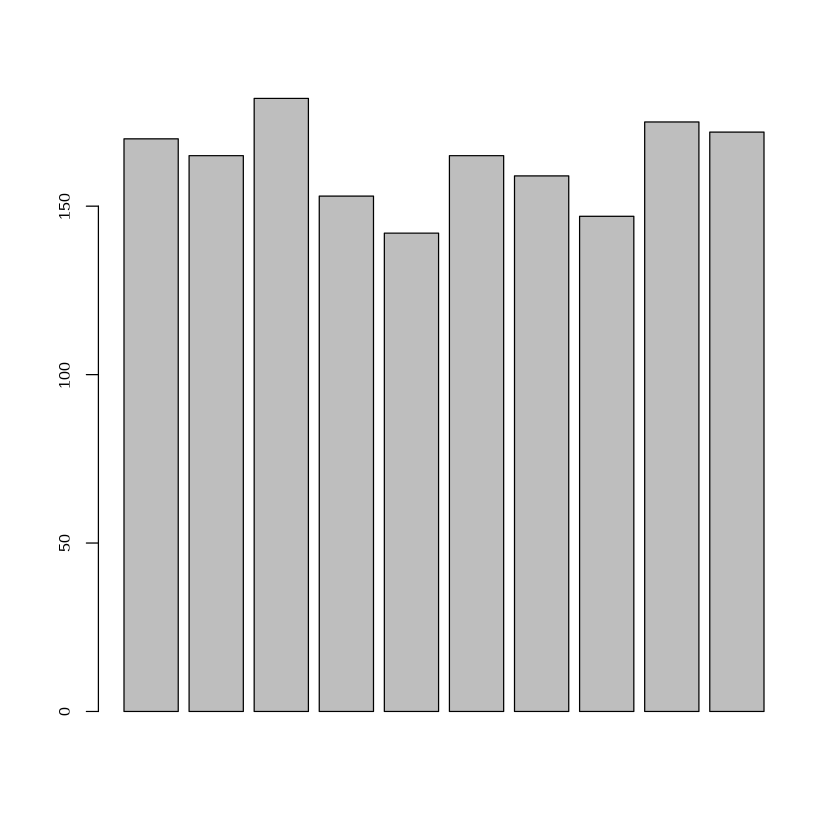

In [22]:
barplot(heights)

그래프의 유형 : type
- p : point 점 (default)
- l : line  선
- b : both  점,선

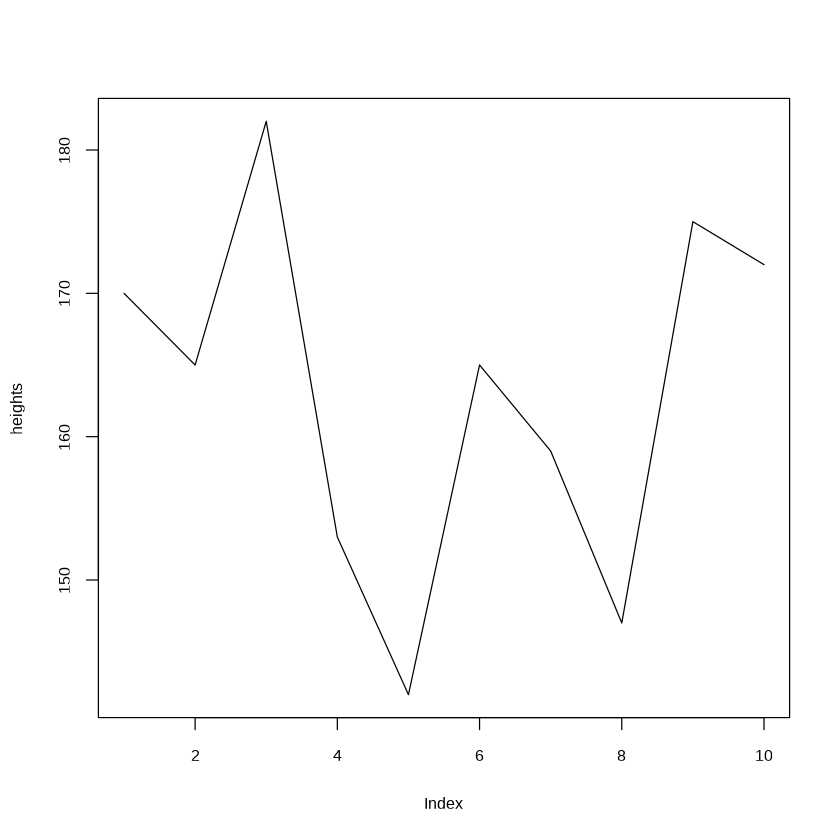

In [11]:
plot(heights, type = 'l')

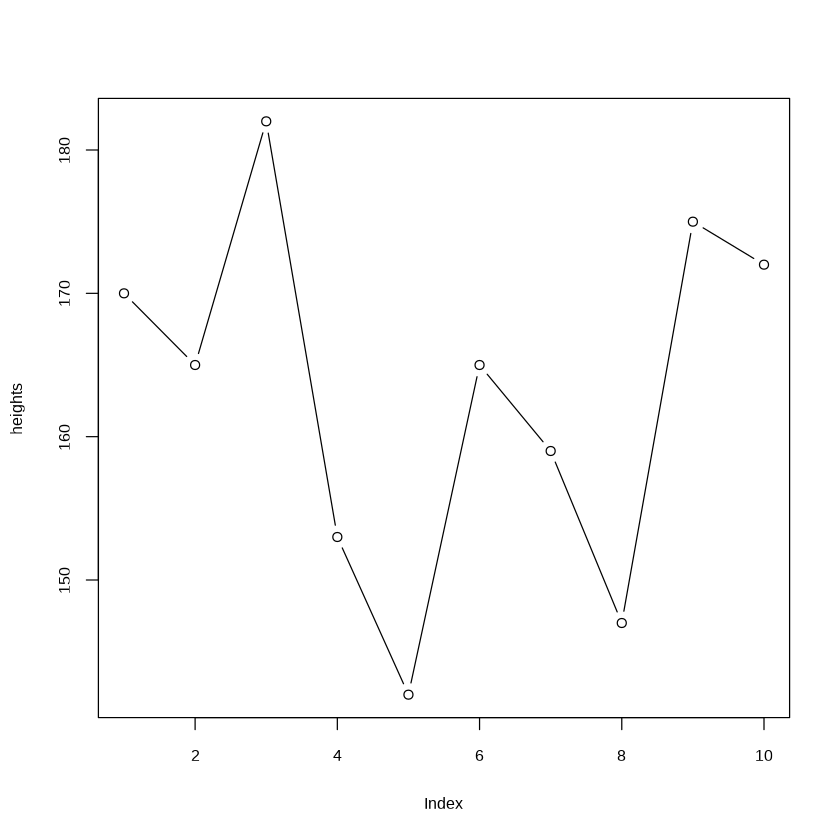

In [10]:
plot(heights, type = 'b')

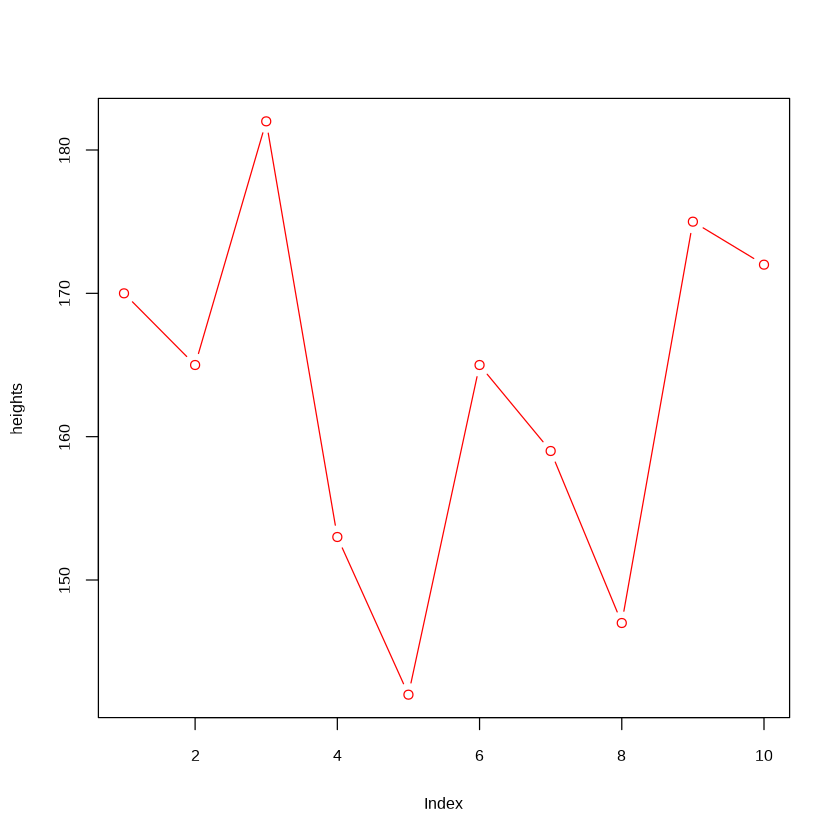

In [12]:
plot(heights, type = 'b', col = 'red')

연습 : 신생아 월별 몸무계 추이
- x축 : 독립변수(입력값)
- y축 : 종속변수(결과값) <- 목표변수

In [13]:
load("baby.rdata")
baby

age,weight
<dbl>,<dbl>
1,4.4
3,5.3
5,7.2
2,5.2
11,8.5
9,7.3
3,6.0
9,10.4
12,10.2


In [17]:
summary(baby$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.400   5.475   6.650   7.060   8.200  10.400 

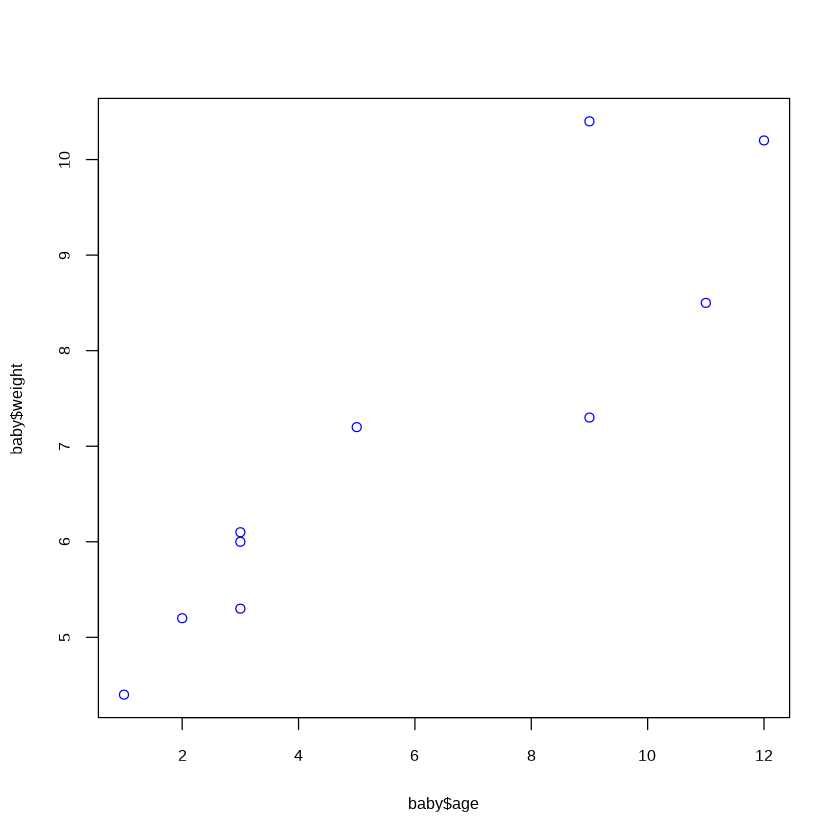

In [21]:
plot(baby$age, baby$weight, col='blue')

plot(독립변수, 종속변수, col='blue') 
- 두변수의 관계(비례관계,반비례관계)를 알수 있음. < 상관분석 ~> 상관계수>
- 관계를 통해 규칙, 법칙을 유추<회귀방정식> ~> 새로운 x축값에 대한 y축값 예측 가능 < 회귀분석 >

In [23]:
load("drugs.rdata")
drugs

age,drugA,drugB
<dbl>,<dbl>,<dbl>
23,16,15
30,20,18
40,27,25
45,40,31
60,60,40


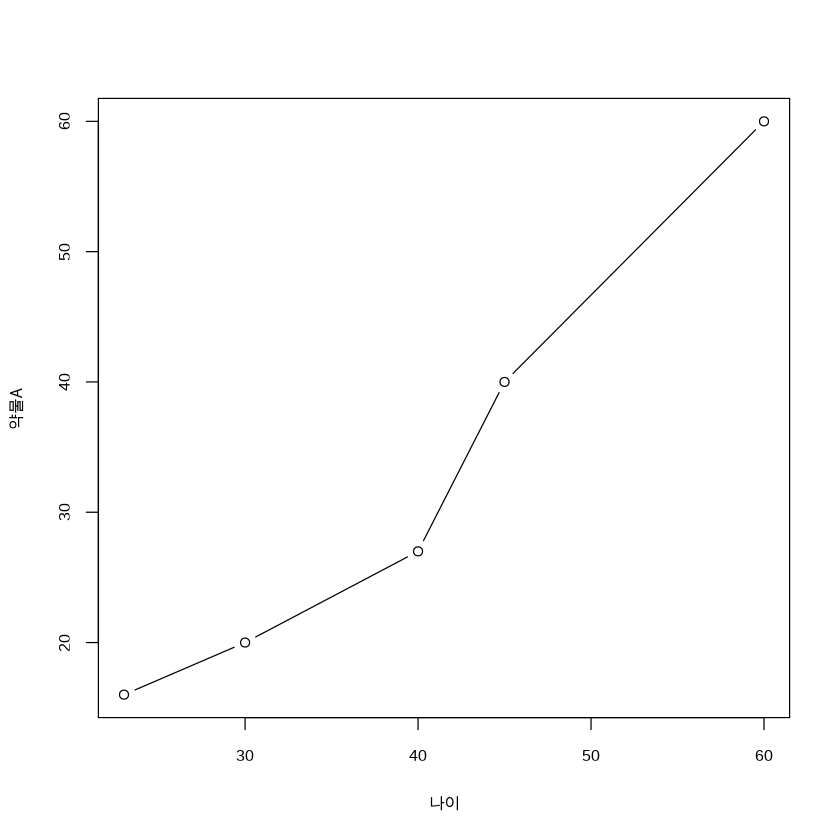

In [44]:
plot(drugs$age, drugs$drugA, type = 'b', xlab = "나이", ylab = "약물A")

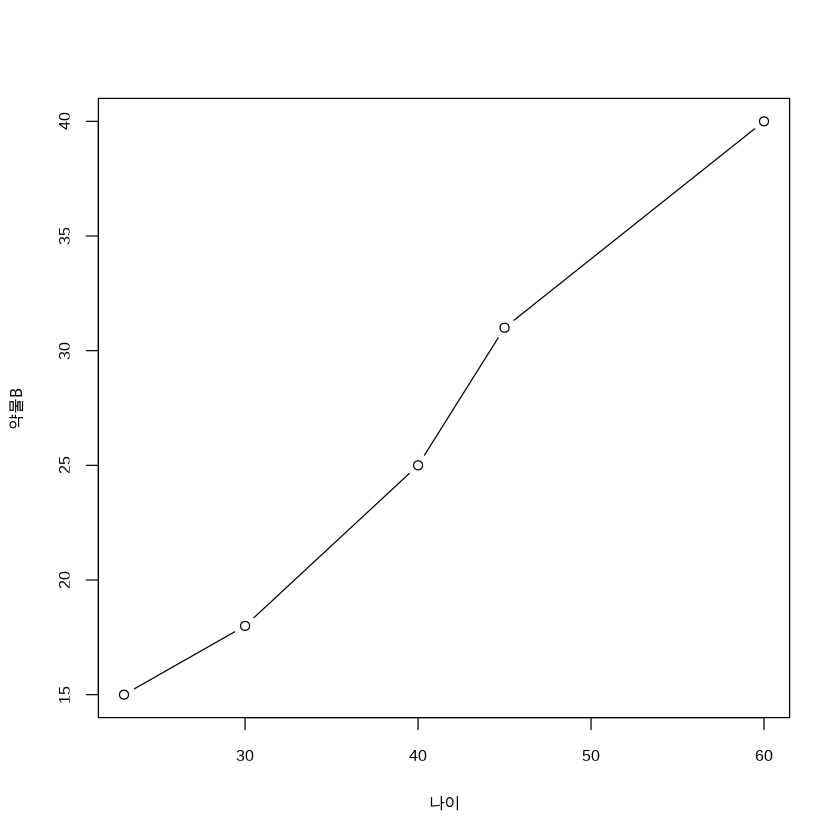

In [46]:
plot(drugs$age, drugs$drugB, type = 'b', xlab = "나이", ylab = "약물B")

두개 그래프 함께 그리기

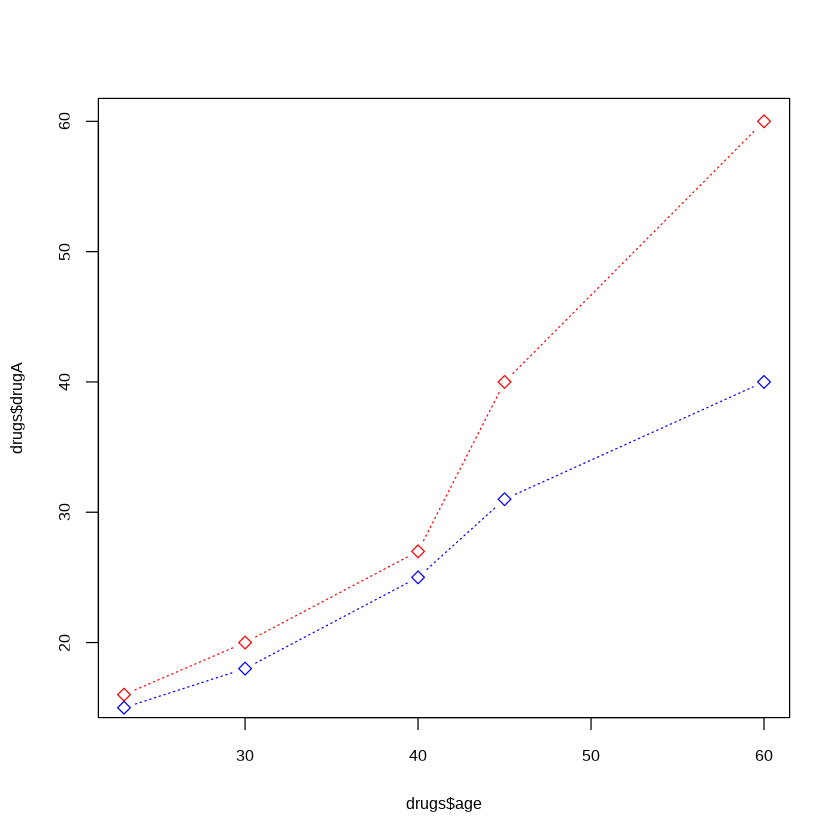

In [84]:
plot(drugs$age, drugs$drugA, type = 'b', col='red', lty=3, pch=5)
lines(drugs$age, drugs$drugB, type = 'b', col='blue', lty=3, pch=5) # 추가된 그래프 추가시 lines()

In [36]:
## ggplot으로 두변수 관계 비교
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



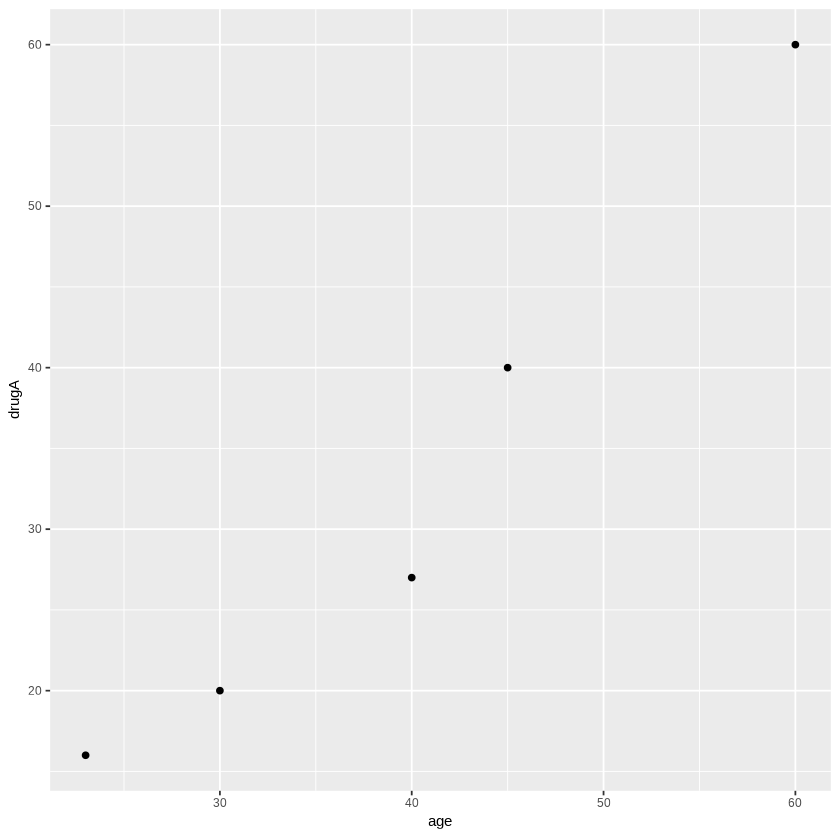

In [93]:
p <- ggplot(drugs, aes(age,drugA))
p + geom_point()

In [96]:
p <- ggplot(drugs, aes(age,drugA))
p + geom_quantile(drugB)

ERROR: ignored

(참고) 산점도의 점모양, 선유형 변경 : pch(0:25), lty(1:6)


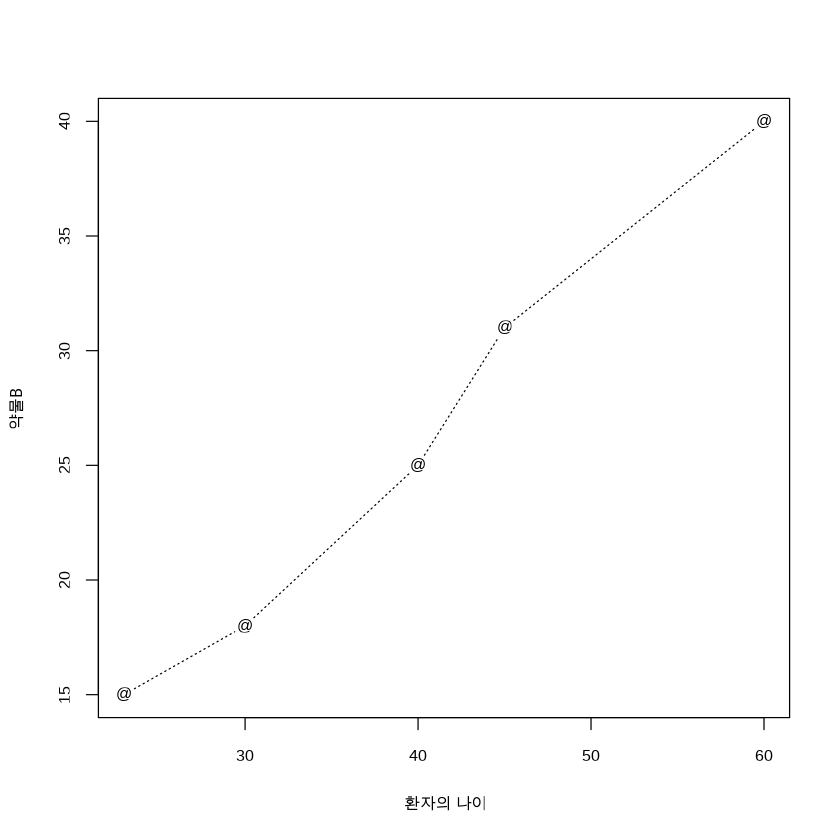

In [49]:
plot(drugs$age, drugs$drugB, type="b", xlab = "환자의 나이", ylab = "약물B", pch = "@", lty = 3)

(참고) 산점도의 선두께 : lwd

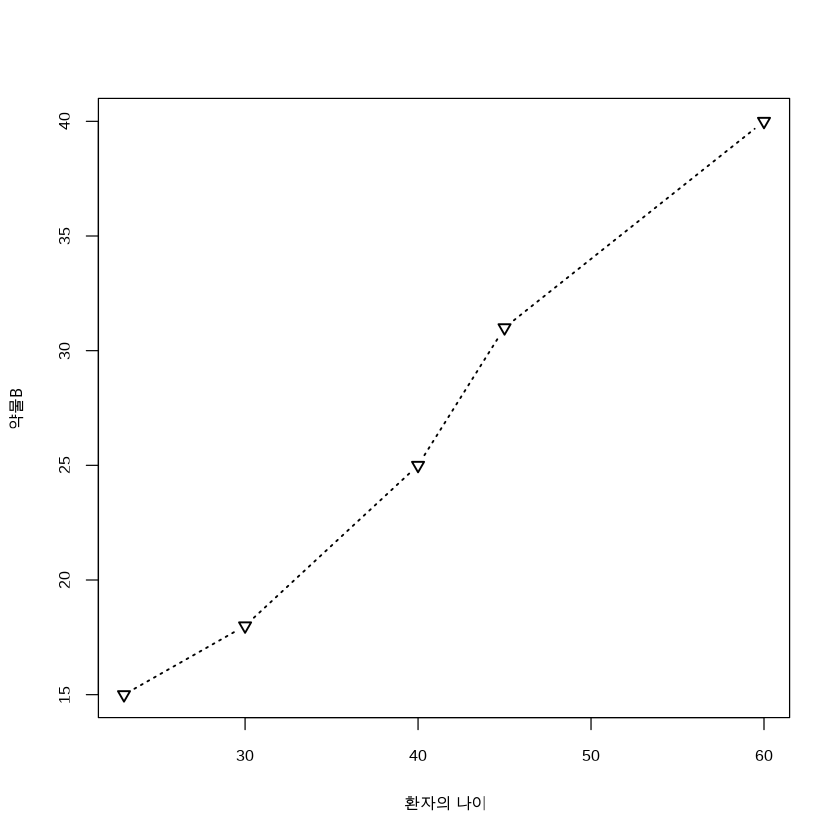

In [50]:
plot(drugs$age, drugs$drugB, type="b", xlab = "환자의 나이", ylab = "약물B", pch = 25, lty = 3, lwd = 1.5)

그래프 축 세부 지정 : axis(x축/y축, 범위)

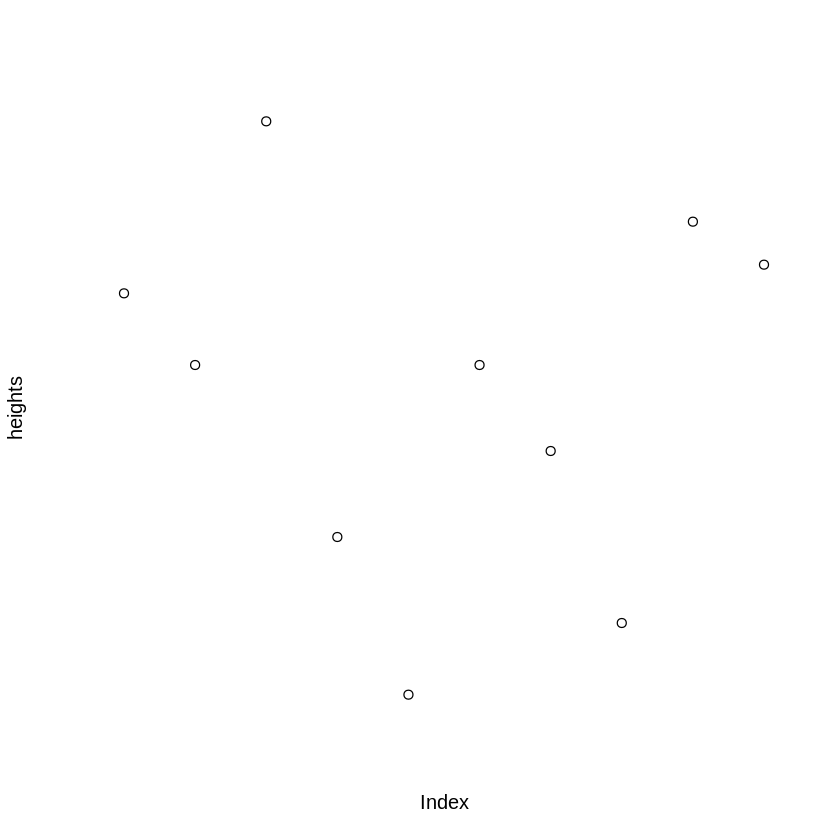

In [52]:
plot(heights, axes = F) # 축은 빼고 그래프만 그림

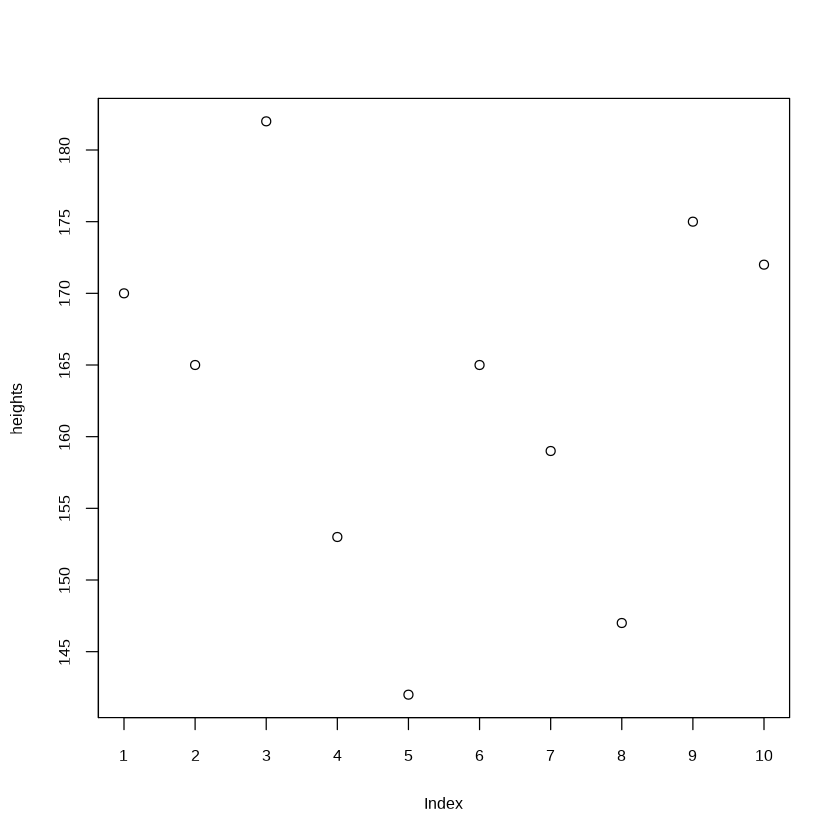

In [55]:
plot(heights, axes = F) # 축은 빼고 그래프만 그림
axis(1, at=c(1:10)) # x 축 지정
axis(2, at=seq(140,185,5)) # y축 지정
box() # 그래프 박스 표시

각점에 수치 표시하기
text(값, 굵기, 표시문자, 위치)
- 위치지정1 : adj=c(x축방향, y축방향)
- 위치지정2 : pos=c(x축방향, y축방향), 1 ~ 4 (b/l/t/r)

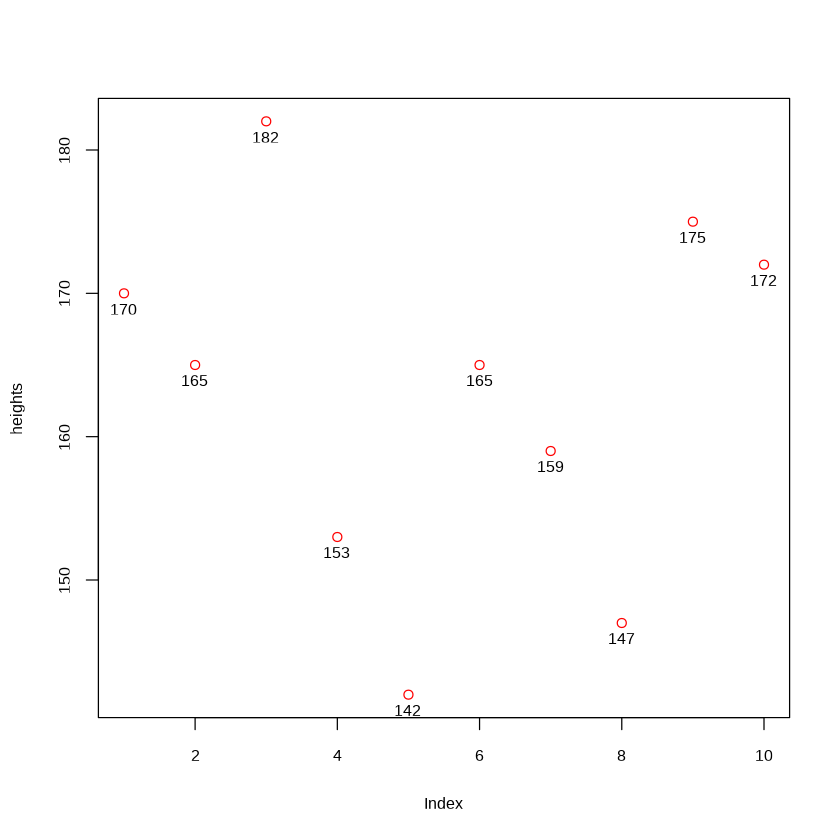

In [66]:
plot(heights, col = "red")
text(heights, cex=1, lab=heights, pos=1)

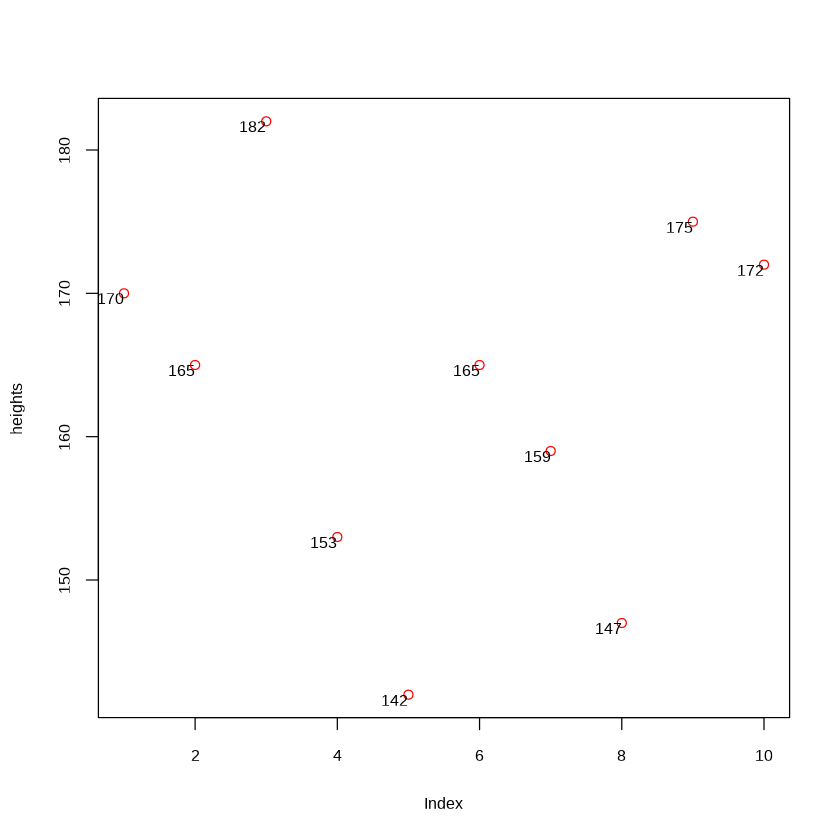

In [80]:
plot(heights, col = "red")
text(heights, cex=1, lab=heights, adj=c(1,1))

고급 분석
- iris 의 독립변수 4개로 종속변수 품종 알아보기

In [85]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


- 수치형 독립변수와 범주형 종속변수를 이용한 시각화

In [89]:
# 붗꽃의 품종별로 그래프에 표시할 색상 지정
# Web Safe Colors Chart 참고 https://htmlcolorcodes.com/color-chart/
colors <- c('#00afbb','#e7b800','#fc4e07')
colors <- colors[as.numeric(iris$Species)]

# qncRhcdml 품종별 그래프에 표시할 기호 지정
symbols <- c(16,17,18)
symbols <- symbols[as.numeric(iris$Species)]

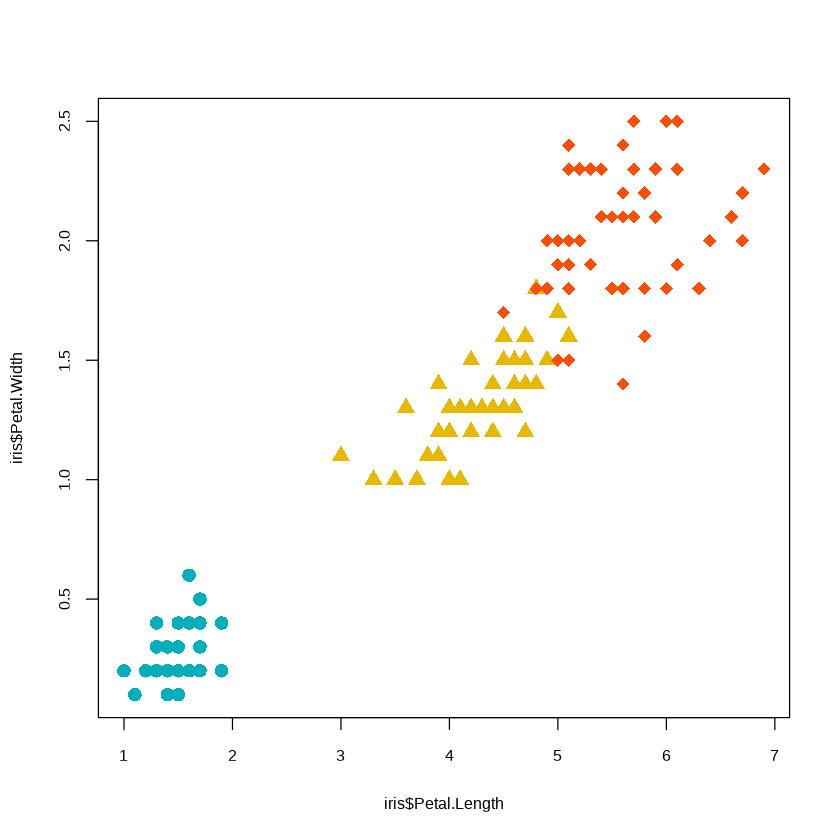

In [90]:
plot(iris$Petal.Length, iris$Petal.Width, col = colors, pch=symbols, cex=1.5)